### Dette eksempelet inneholder to figur-eksempler: 1) bruke en for-løkke og 2) bruke en if-løkke

### Det er akkurat samme oppgave som den som kun heter "løkker.ipynb" men inneholder noen feil og oppgaver som går på å lese dokumentasjon

In [4]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
from matplotlib import cm # for å lage fargeskalaer


import sys
# Bytt ut stien under slik at den peker på hvor på din PC du har 
# lagret mappen "Funksjoner".
sys.path.append("W:\Work\Documents\EkteData\EkteData\Funksjoner")
#from EkteDataFunk import loadData # for filinnlasting

In [5]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)

In [8]:
ax=plt.axes() # Lag akser å plotte i

# Plot tidsserien
ax.plot(tid, temp)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År'
    ylabel='Temperatur [\u2103]', 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.5,10.5] # Sett grense for y-aksen
) # Sett grense for y-aksen
ax.grid() # Legg til rutenett (grid) i bakgrunnen
plt.show() 

SyntaxError: invalid syntax (<ipython-input-8-7ec467828ef8>, line 10)

### Hva er en for-løkke?

In [9]:
tid

array([1861., 1862., 1863., 1864., 1865., 1866., 1867., 1868., 1869.,
       1870., 1871., 1872., 1873., 1874., 1875., 1876., 1877., 1878.,
       1879., 1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887.,
       1888., 1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896.,
       1897., 1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905.,
       1906., 1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914.,
       1915., 1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923.,
       1924., 1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932.,
       1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
       1942., 1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950.,
       1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988.,

In [10]:
for val in tid(:10):
    print(val)

SyntaxError: invalid syntax (<ipython-input-10-b0fed788b6fa>, line 1)

In [11]:
for count, val in enumerate(tid[:10.0]):
    print(count, val)

TypeError: slice indices must be integers or None or have an __index__ method

### Hva er en if-løkke?

In [12]:
start=1861

if start>=1861:
    print('startyear is '+str(start))

startyear is 1861


In [23]:
if start>=1900:
    print(start)
    else:
        print('startyear is '+str(start)+', not 1900')

SyntaxError: invalid syntax (<ipython-input-23-9d4a03b224da>, line 3)

In [22]:
for count, T in enumerate(temp):
if T>=9:
        print(count, T)
    elif T<6.5:
        print(count, T)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

### Bruk en if-løkke til å plotte blå punkte når temperaturen er under gjennomsnittet og røde punkter når temperaturen er over gjennomsnittet

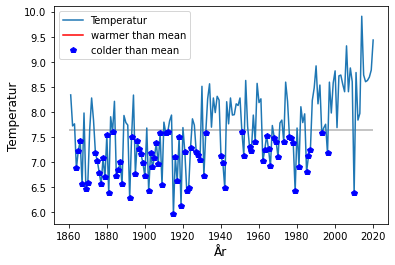

In [37]:
mean=np.mean(temp)

plt.plot(tid, temp, label='Temperatur')

for count, T in enumerate(temp):
    if T > mean:
        plt.plot(tid[count], T, 'r')
    elif T < mean:
        plt.plot(tid[count], T, 'bp')

plt.plot(np.nan, np.nan, 'r', label="warmer than mean")
plt.plot(np.nan, np.nan, 'bp', label='colder than mean')
plt.legend()

plt.hlines(mean, 1860, 2020, 'k', alpha=.3)
plt.ylabel('Temperatur')
plt.xlabel('År')
plt.show()

#### Oppgave 1: Endre de positive markørene til en rød trekant med oransje kant

#### Oppgave 2: Gjør linjen i bakgrunnen litt gjennomsiktig
_______________

### Bruk en for-løkke til å finne standardavvik og gjennomsnitt for 10-års perioder

In [14]:
# Siden datasettet vårt er har frekvens på 1 år trenger vi å dele 
# datasettet inn i ti og ti verdier. Derfor er diff=10
diff=10
indeks=np.arange(0, len(tid), diff) 
indeks

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150])

In [15]:
# Lag to vektorer som kan fylles med verdier: 
# En for gjennomsnitt og en for std. 
mean=np.zeros(len(indeks))
std=np.zeros(len(indeks))

In [16]:
for count, val in enumerate(indeks):
    mean[count]=np.mean(temp[val:val+diff])
    std[count]=np.std(temp[val:val+diff])


In [17]:
tid_mean=np.arange(tid[0]+5, tid[-1], 10)
tid_mean

array([1866., 1876., 1886., 1896., 1906., 1916., 1926., 1936., 1946.,
       1956., 1966., 1976., 1986., 1996., 2006., 2016.])

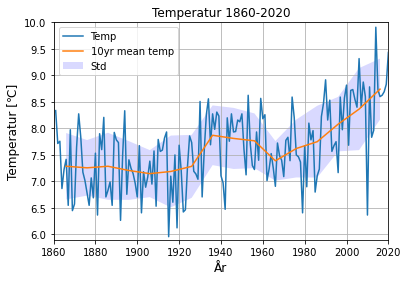

In [18]:
ax=plt.axes() # Lag akser å plotte i

# Plot tidsserien
ax.plot(tid, temp, label='Temp')
ax.plot(tid_mean, mean, label='10yr mean temp')

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.9,10] # Sett grense for y-aksen
)

ax.fill( 
    np.append(tid_mean, np.flip(tid_mean)),
    np.append(mean-std, np.flip(mean+std)), 
    color='b', alpha=.15, edgecolor=None, label='Std'
)
ax.grid() # Legg til rutenett (grid) i bakgrunnen
plt.legend()
plt.show() 